# Proyecto final de Python para Data Science
## Estudiante: Erick J. Pineda Amézquita
## Carnet:        17012140

Problema a resolver:

Crear un modelo lineal univariable para predecir el precio de casas en base a variables obtenidas, según los valores proporcionados en el archivo: "proyecto_training_data.npy"


#### Importar paquetes/librerías a utilizar:

In [29]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import lmplot


Extracción de los datos a partir del archivo .npy

In [30]:
origenDeDatos = np.load('proyecto_training_data.npy')
type(origenDeDatos)

##np.savetxt("data.txt", OrigenDeDatos.tolist())
##OrigenDeDatos.tolist()


numpy.ndarray

### Separación de los datos en 80% y 20%

In [31]:
numDatosEntrenamiento=int(0.8*origenDeDatos.shape[0])
print("Cantidad de datos para ENTRENAMIENTO:   ", numDatosEntrenamiento)

numDatosValidacion=int(0.2*origenDeDatos.shape[0])
print("Cantidad de datos para VALIDACION:      ", numDatosValidacion)


Cantidad de datos para ENTRENAMIENTO:    1168
Cantidad de datos para VALIDACION:       292


#### Creación de Data Frames

In [32]:
dfEntrenamiento = pd.DataFrame(origenDeDatos[:numDatosEntrenamiento])
dfEntrenamiento.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

dfValidacion = pd.DataFrame(origenDeDatos[numDatosEntrenamiento:])
dfValidacion.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

print("Data Frame de Entrenamiento:   ",dfEntrenamiento.shape)
print("Data Frame de Validacion:      ",dfValidacion.shape)


Data Frame de Entrenamiento:    (1168, 6)
Data Frame de Validacion:       (292, 6)


#### Presentación de datos para ver como vienen

In [33]:
dfEntrenamiento.head(2)

,SalePrice,Overall,Floor,Rooms,Year,Front
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0


#### Analitica de datos por medio de estadística

In [34]:
dfEntrenamiento.describe()

,SalePrice,Overall,Floor,Rooms,Year,Front
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


#### Media, minimo, maximo, rangos

In [35]:
dfEntrenamiento.mean(axis=0)


SalePrice    180590.277397
Overall           6.101027
Floor          1156.323630
Rooms             6.485445
Year           1971.451199
Front            69.946985
dtype: float64

In [36]:
dfEntrenamiento.min(axis=0)


SalePrice    34900.0
Overall          1.0
Floor          334.0
Rooms            2.0
Year          1875.0
Front           21.0
dtype: float64

In [37]:
dfEntrenamiento.max(axis=0)


SalePrice    755000.0
Overall          10.0
Floor          3228.0
Rooms            14.0
Year           2010.0
Front           313.0
dtype: float64

In [38]:
dfEntrenamiento.std(axis=0)


SalePrice    78815.697902
Overall          1.378025
Floor          373.780374
Rooms            1.609141
Year            29.951707
Front           23.478161
dtype: float64

#### Correlación entre todas las variables

In [39]:
dfEntrenamiento.corr()


,SalePrice,Overall,Floor,Rooms,Year,Front
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
Overall,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
Floor,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
Rooms,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
Year,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
Front,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


#### Rangos


In [40]:
print ("Intervalo SalePrice:   [", dfEntrenamiento["SalePrice"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Overall:     [", dfEntrenamiento["Overall"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Floor:       [", dfEntrenamiento["Floor"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Rooms:       [", dfEntrenamiento["Rooms"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Year:        [", dfEntrenamiento["Year"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Front:       [", dfEntrenamiento["Front"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")



Intervalo SalePrice:   [ 34900.0   -    755000.0 ]
Intervalo Overall:     [ 1.0   -    755000.0 ]
Intervalo Floor:       [ 334.0   -    755000.0 ]
Intervalo Rooms:       [ 2.0   -    755000.0 ]
Intervalo Year:        [ 1875.0   -    755000.0 ]
Intervalo Front:       [ 21.0   -    755000.0 ]


##  Graficas de cada Variable. Histogramas

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


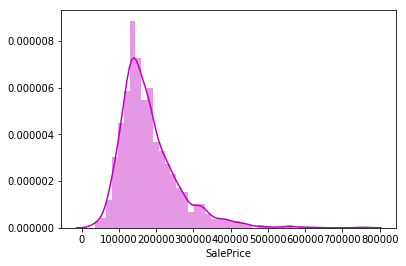

In [41]:
#sns.distplot(dfEntrenamiento["SalePrice"], hist=False, color="g", kde_kws={"shade": True})
sns.distplot(dfEntrenamiento["SalePrice"], color="m")


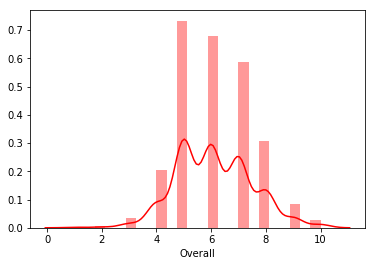

In [42]:
sns.distplot(dfEntrenamiento["Overall"], color="r")


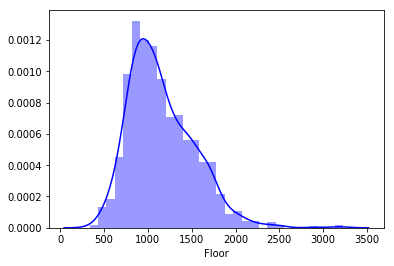

In [43]:
sns.distplot(dfEntrenamiento["Floor"], color="b")


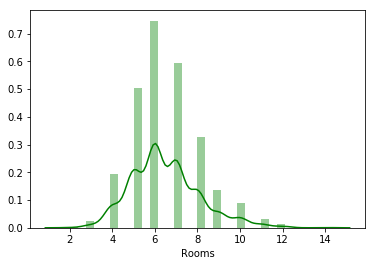

In [44]:
sns.distplot(dfEntrenamiento["Rooms"], color="g")


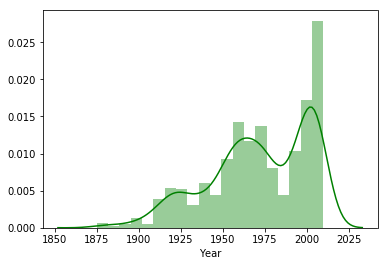

In [45]:
sns.distplot(dfEntrenamiento["Year"], color="g",bins=20)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


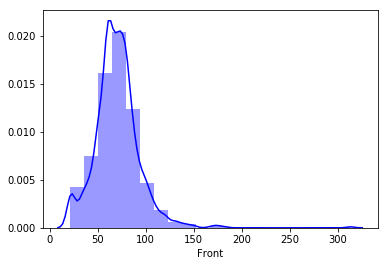

In [46]:
sns.distplot(dfEntrenamiento["Front"], color="b",bins=20)



# Graficas X,Y para observar el comportamiento del precio y sus variables

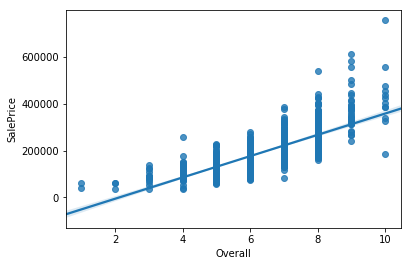

In [47]:
ax = sns.regplot(x="Overall", y="SalePrice", data=dfEntrenamiento)

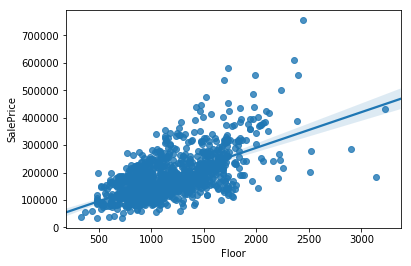

In [48]:
ax = sns.regplot(x="Floor", y="SalePrice", data=dfEntrenamiento)

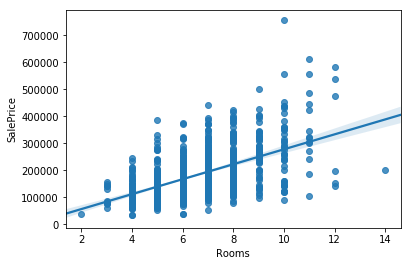

In [49]:
ax = sns.regplot(x="Rooms", y="SalePrice", data=dfEntrenamiento)

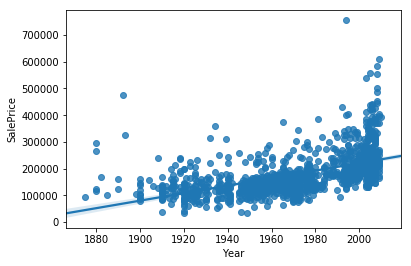

In [50]:
ax = sns.regplot(x="Year", y="SalePrice", data=dfEntrenamiento)

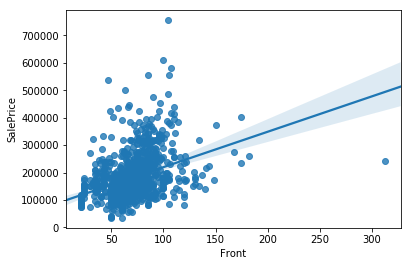

In [51]:
ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)

### Funcion de entrenamiento manual

## Se tomarán las 2 graficas: Overall y Floor, segun la tendencia de las mismas

In [188]:
def regresionLineal(argX, argY, EPOCHS, imprimir_error_cada, lr):
    ##mb=np.array([0.1,0.2])
    count=0
    mb=np.array([27000.0,96199.0])
    unos = np.ones_like(argX)
    arrXUnos=np.column_stack((argX,unos))
    vectorDeErrores=np.ndarray([])
    #vectorModeloMB=np.ndarray([])
    vectorModeloMB = np.ones(shape = (0, 2), dtype = float)
    arrError=np.ndarray([])
    
    ##error= 0.5*promedio*(argY-yhat)**2
    ### Para obtener la función de promedio, se va a dividir en dos unidades:
    ## La función según el texto es: error=1/2 * promedio ((y - yhat)**2)
    ##arrError= 0.5*(0.5*(argY-yhat)**2)
    
    while count < EPOCHS:
        yhat=np.dot(arrXUnos,mb)
        arrError= 0.5*(np.mean(argY-yhat)**2)
        gradiente = np.mean(np.dot(np.transpose(yhat - argY),arrXUnos))
        
        mb[0] = mb[0]+lr * gradiente
        mb[1] = mb[1]+lr * gradiente
        
        vectorDeErrores=np.append(vectorDeErrores,arrError)
        
        #vectorModeloMB=np.append(vectorDeErrores,np.ndarray(mb))
        vectorModeloMB=np.append(vectorModeloMB, [[mb[0], mb[1]]], axis = 0)
        
        if ((count % imprimir_error_cada == 0)):
            print("*Iteracion:", count, " Argumentos: ", 
                  mb , " *Error:", arrError, " *Gradiente: ",gradiente)
        count+=1

    
    return vectorModeloMB,vectorDeErrores
    #return vectorDeErrores.shape
    #return vectorModeloMB
regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 50, 10, 0.0001)



*Iteracion: 0  Argumentos:  [ 58275.40895 127474.40895]  *Error: 3226973589.75071  *Gradiente:  312754089.5
*Iteracion: 10  Argumentos:  [4.99704085e+10 4.99704777e+10]  *Error: 3.827610489091321e+21  *Gradiente:  376490603038499.2
*Iteracion: 20  Argumentos:  [6.0153915e+16 6.0153915e+16]  *Error: 5.546639596820508e+33  *Gradiente:  4.53216053554727e+20
*Iteracion: 30  Argumentos:  [7.24127501e+22 7.24127501e+22]  *Error: 8.037708196173841e+45  *Gradiente:  5.455774713684367e+26
*Iteracion: 40  Argumentos:  [8.71698273e+28 8.71698273e+28]  *Error: 1.1647548379361395e+58  *Gradiente:  6.567613281351531e+32


(array([[5.82754089e+04, 1.27474409e+05],
        [1.85115957e+05, 2.54314957e+05],
        [6.99530486e+05, 7.68729486e+05],
        [2.78579005e+06, 2.85498905e+06],
        [1.12468243e+07, 1.13160233e+07],
        [4.55613950e+07, 4.56305940e+07],
        [1.84727568e+08, 1.84796767e+08],
        [7.49129897e+08, 7.49199096e+08],
        [3.03811999e+09, 3.03818919e+09],
        [1.23213482e+10, 1.23214174e+10],
        [4.99704085e+10, 4.99704777e+10],
        [2.02659937e+11, 2.02660007e+11],
        [8.21907591e+11, 8.21907660e+11],
        [3.33332838e+12, 3.33332844e+12],
        [1.35186465e+13, 1.35186466e+13],
        [5.48262227e+13, 5.48262228e+13],
        [2.22353229e+14, 2.22353229e+14],
        [9.01775755e+14, 9.01775755e+14],
        [3.65724175e+15, 3.65724175e+15],
        [1.48323096e+16, 1.48323096e+16],
        [6.01539150e+16, 6.01539150e+16],
        [2.43960218e+17, 2.43960218e+17],
        [9.89405059e+17, 9.89405059e+17],
        [4.01263116e+18, 4.0126311

In [ ]:
# lmplot(x, y, data=dsDatosEntrenamiento, fit_reg=False)
#dsDatosEntrenamiento.columns = ["Sequence", "Start", "End", "Coverage"]
##arrPrecio=dsDatosEntrenamiento[:,0]
##arrOver=dsDatosEntrenamiento[:,1]
##arrFloor=dsDatosEntrenamiento[:,2]
##arrRooms=dsDatosEntrenamiento[:,3]
##arrYear=dsDatosEntrenamiento[:,4]
##arrFront=dsDatosEntrenamiento[:,5]


##mediaPrecio=np.mean(dsPrecio)
##minPrecio=np.min(dsPrecio)
##maxPrecio=np.max(dsPrecio)
##stdPrecio=np.std(dsPrecio)

##dsOverallQual=dsDatosEntrenamiento[:,1]
##mediaOverallQual=np.mean(dsOverallQual)
##minOverallQual=np.min(dsOverallQual)
##maxOverallQual=np.max(dsOverallQual)
##stdOverallQual=np.std(dsOverallQual)
##print(mediaOverallQual)
##print(minOverallQual)
##print(maxOverallQual)
##print(stdOverallQual)


